In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler


import pickle

In [63]:
df = pd.read_csv('data/raw_recording.csv')
df

x_pos   y_pos  channel_1  channel_2
0     2588.0   593.0        377        566
1     2588.0   593.0         77        565
2     2588.0   593.0         77        564
3     2584.0   583.0         77        564
4     2584.0   583.0         76        563
...      ...     ...        ...        ...
8484   143.0  1245.0         34        283
8485   143.0  1245.0         34        283
8486   143.0  1245.0         34        283
8487   143.0  1245.0         34        282
8488   143.0  1245.0         34        282

[8489 rows x 4 columns]

In [64]:
# df.drop(columns=['time', 'start', 'end'], inplace=True)

In [65]:
for i in range(1,1000):

    df[f'channel_1_{i}'] = df['channel_1'].shift(i)
    df[f'channel_2_{i}'] = df['channel_2'].shift(i)
#     df[f'channel_3_{i}'] = df['channel_3'].shift(i)
#     df[f'channel_4_{i}'] = df['channel_4'].shift(i)

In [66]:
df['x_diff'] = df['x_pos'].diff()
df['y_diff'] = df['y_pos'].diff()

In [67]:
df.dropna(inplace=True)

In [68]:
df.head()

x_pos  y_pos  channel_1  channel_2  channel_1_1  channel_2_1  \
999   1617.0    0.0         46        305         46.0        305.0   
1000  1617.0    0.0         46        304         46.0        305.0   
1001  1581.0    0.0         46        305         46.0        304.0   
1002  1581.0    0.0         46        304         46.0        305.0   
1003  1581.0    0.0         46        305         46.0        304.0   

      channel_1_2  channel_2_2  channel_1_3  channel_2_3  ...  channel_1_996  \
999          46.0        305.0         46.0        305.0  ...           77.0   
1000         46.0        305.0         46.0        305.0  ...           76.0   
1001         46.0        305.0         46.0        305.0  ...           76.0   
1002         46.0        304.0         46.0        305.0  ...           76.0   
1003         46.0        305.0         46.0        304.0  ...           76.0   

      channel_2_996  channel_1_997  channel_2_997  channel_1_998  \
999           564.0           77.0          564.0           77.0   
1000          563.0           77.0          564.0           77.0   
1001          563.0           76.0          563.0           77.0   
1002          563.0           76.0          563.0           76.0   
1003          563.0           76.0          563.0           76.0   

      channel_2_998  channel_1_999  channel_2_999  x_diff  y_diff  
999           565.0          377.0          566.0     0.0     0.0  
1000          564.0           77.0          565.0     0.0     0.0  
1001          564.0           77.0          564.0   -36.0     0.0  
1002          563.0           77.0          564.0     0.0     0.0  
1003          563.0           76.0          563.0     0.0     0.0  

[5 rows x 2004 columns]

In [69]:
X = df.drop(columns=['x_pos', 'y_pos', 'x_diff', 'y_diff'])
y = df['x_diff']

W = X
z = df['y_diff']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state = 42)

In [71]:
lr_x = LinearRegression()
lr_x.fit(X_train, y_train)

lr_y = LinearRegression()
lr_y.fit(W_train, z_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lr_x.score(X_train, y_train), lr_x.score(X_test, y_test)

(0.35209845826612385, -3.656187013256263)

In [73]:
lr_y.score(W_train, z_train), lr_y.score(W_test, z_test)

(0.39813743371030874, -2.534034964510673)

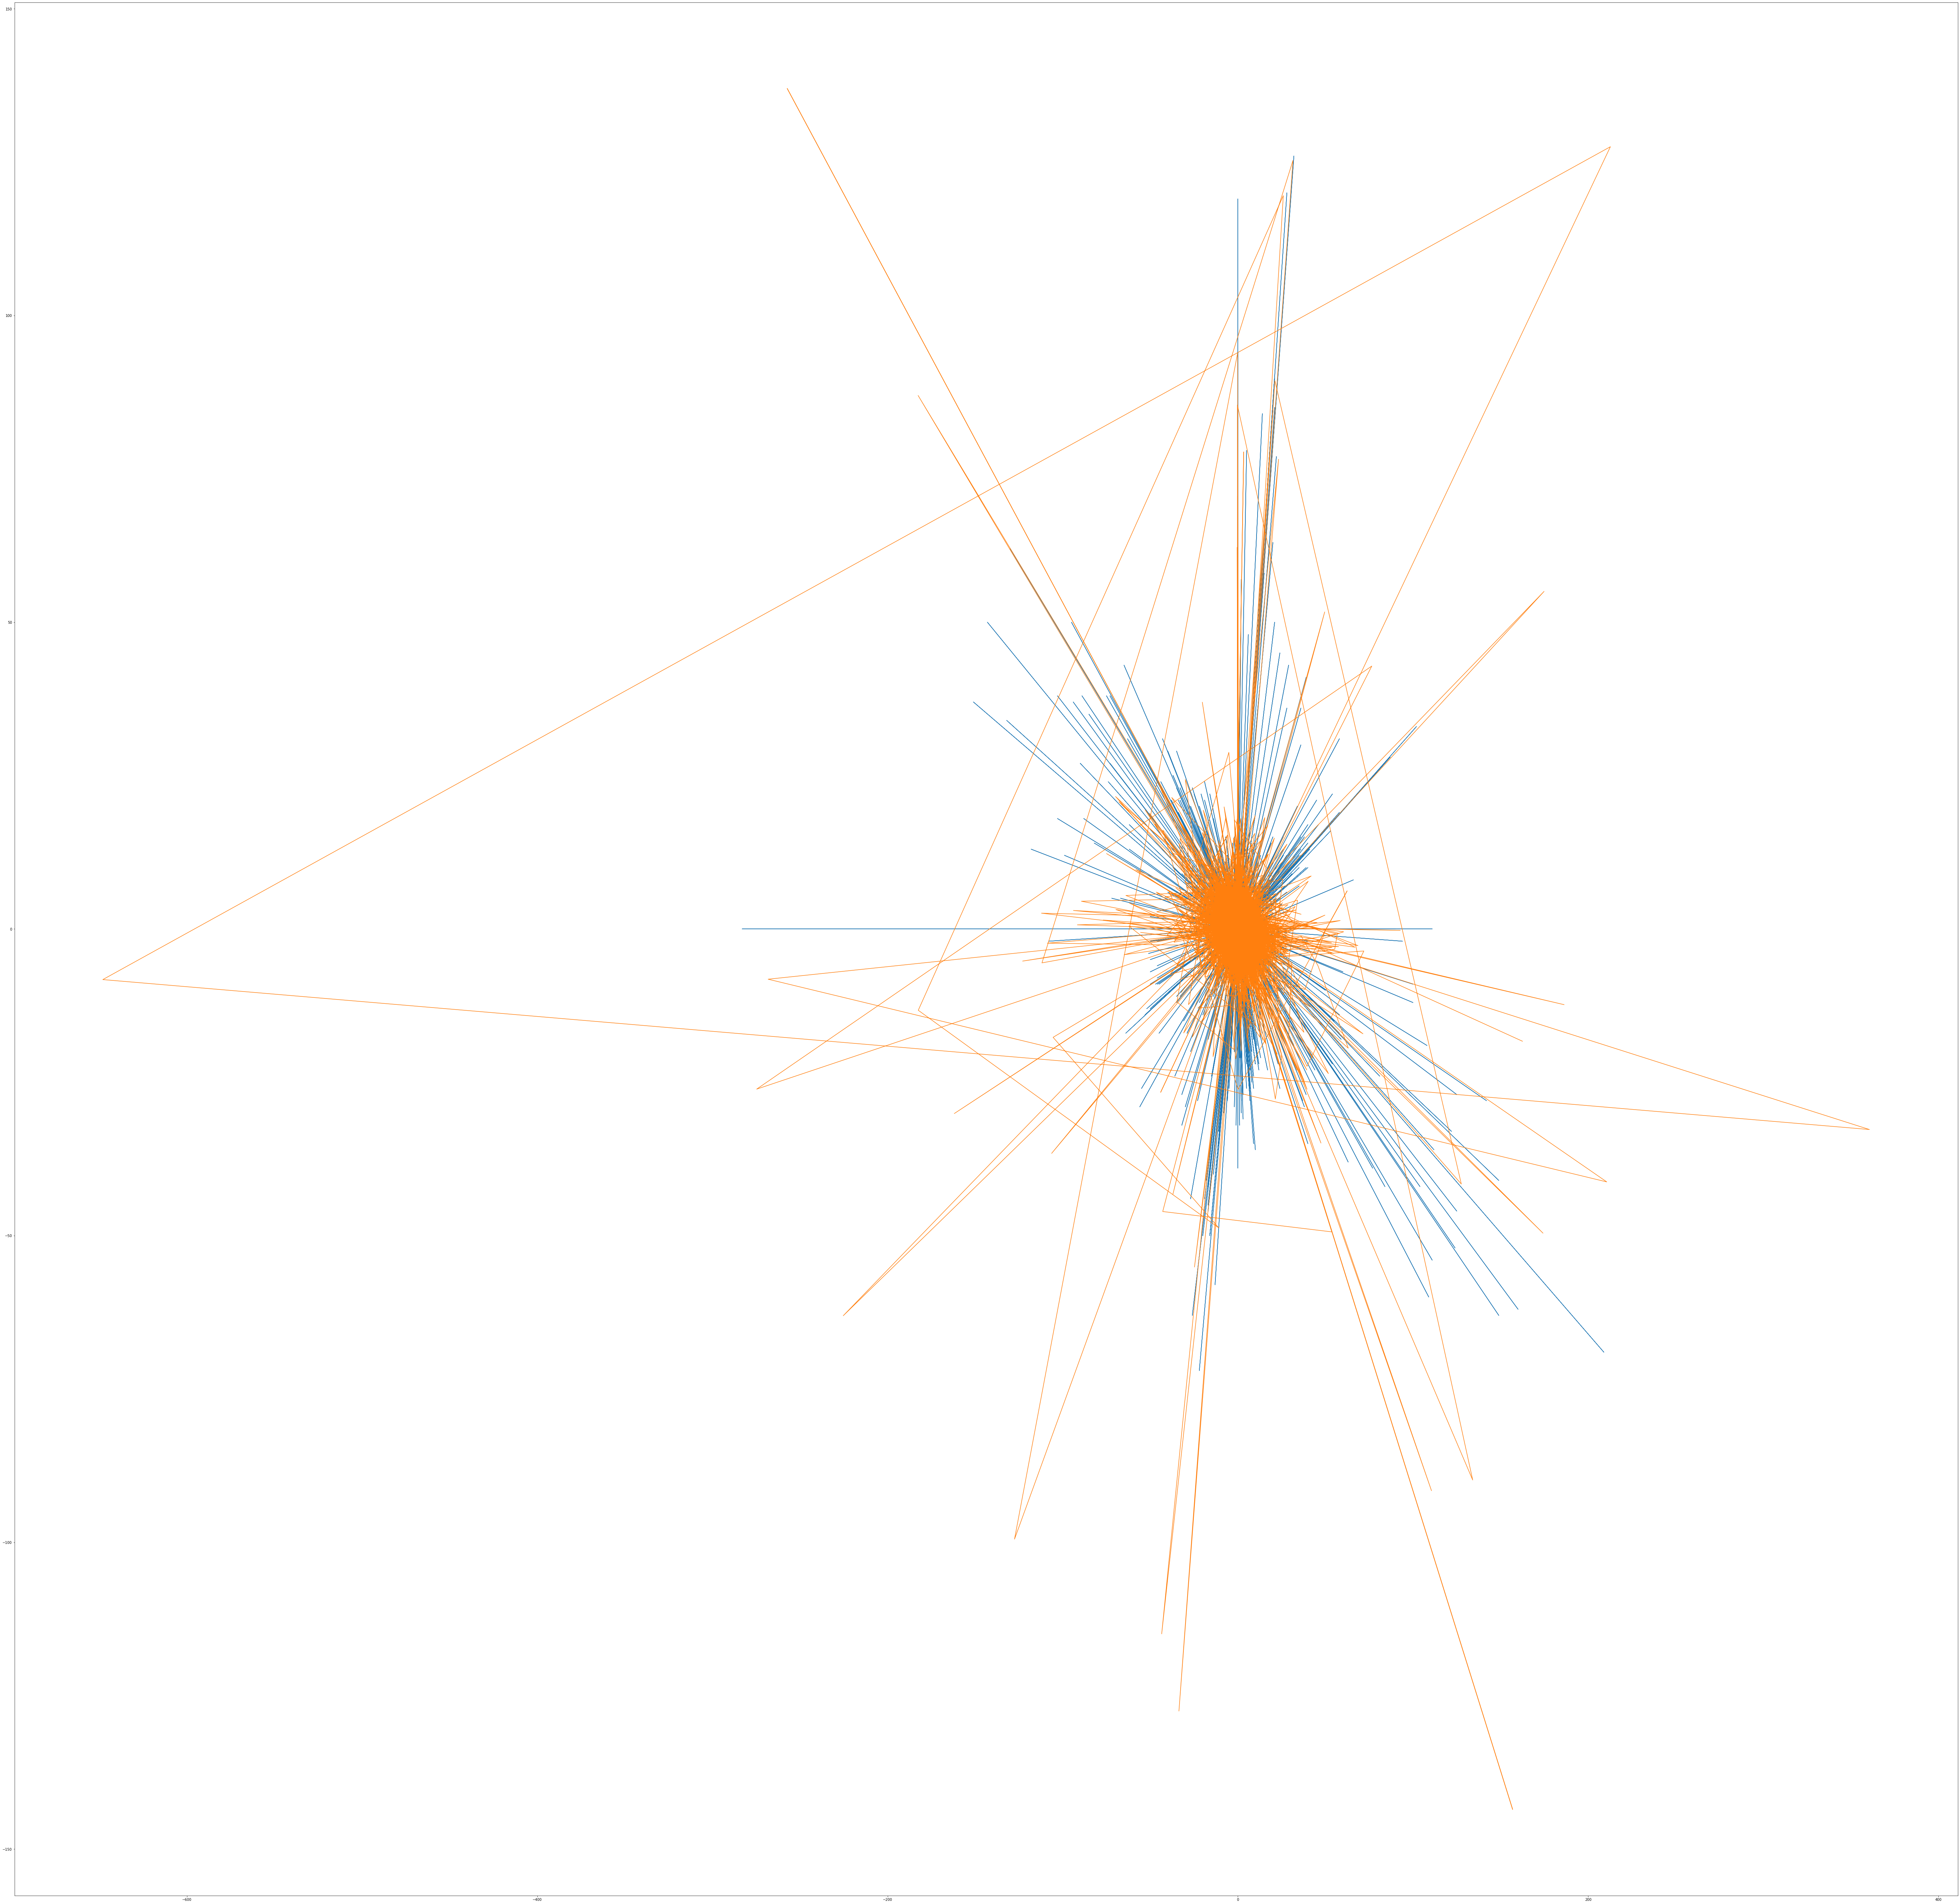

In [74]:
plt.figure(figsize=(100,100))
plt.plot(y, z);
plt.plot(lr_x.predict(X), lr_y.predict(W));


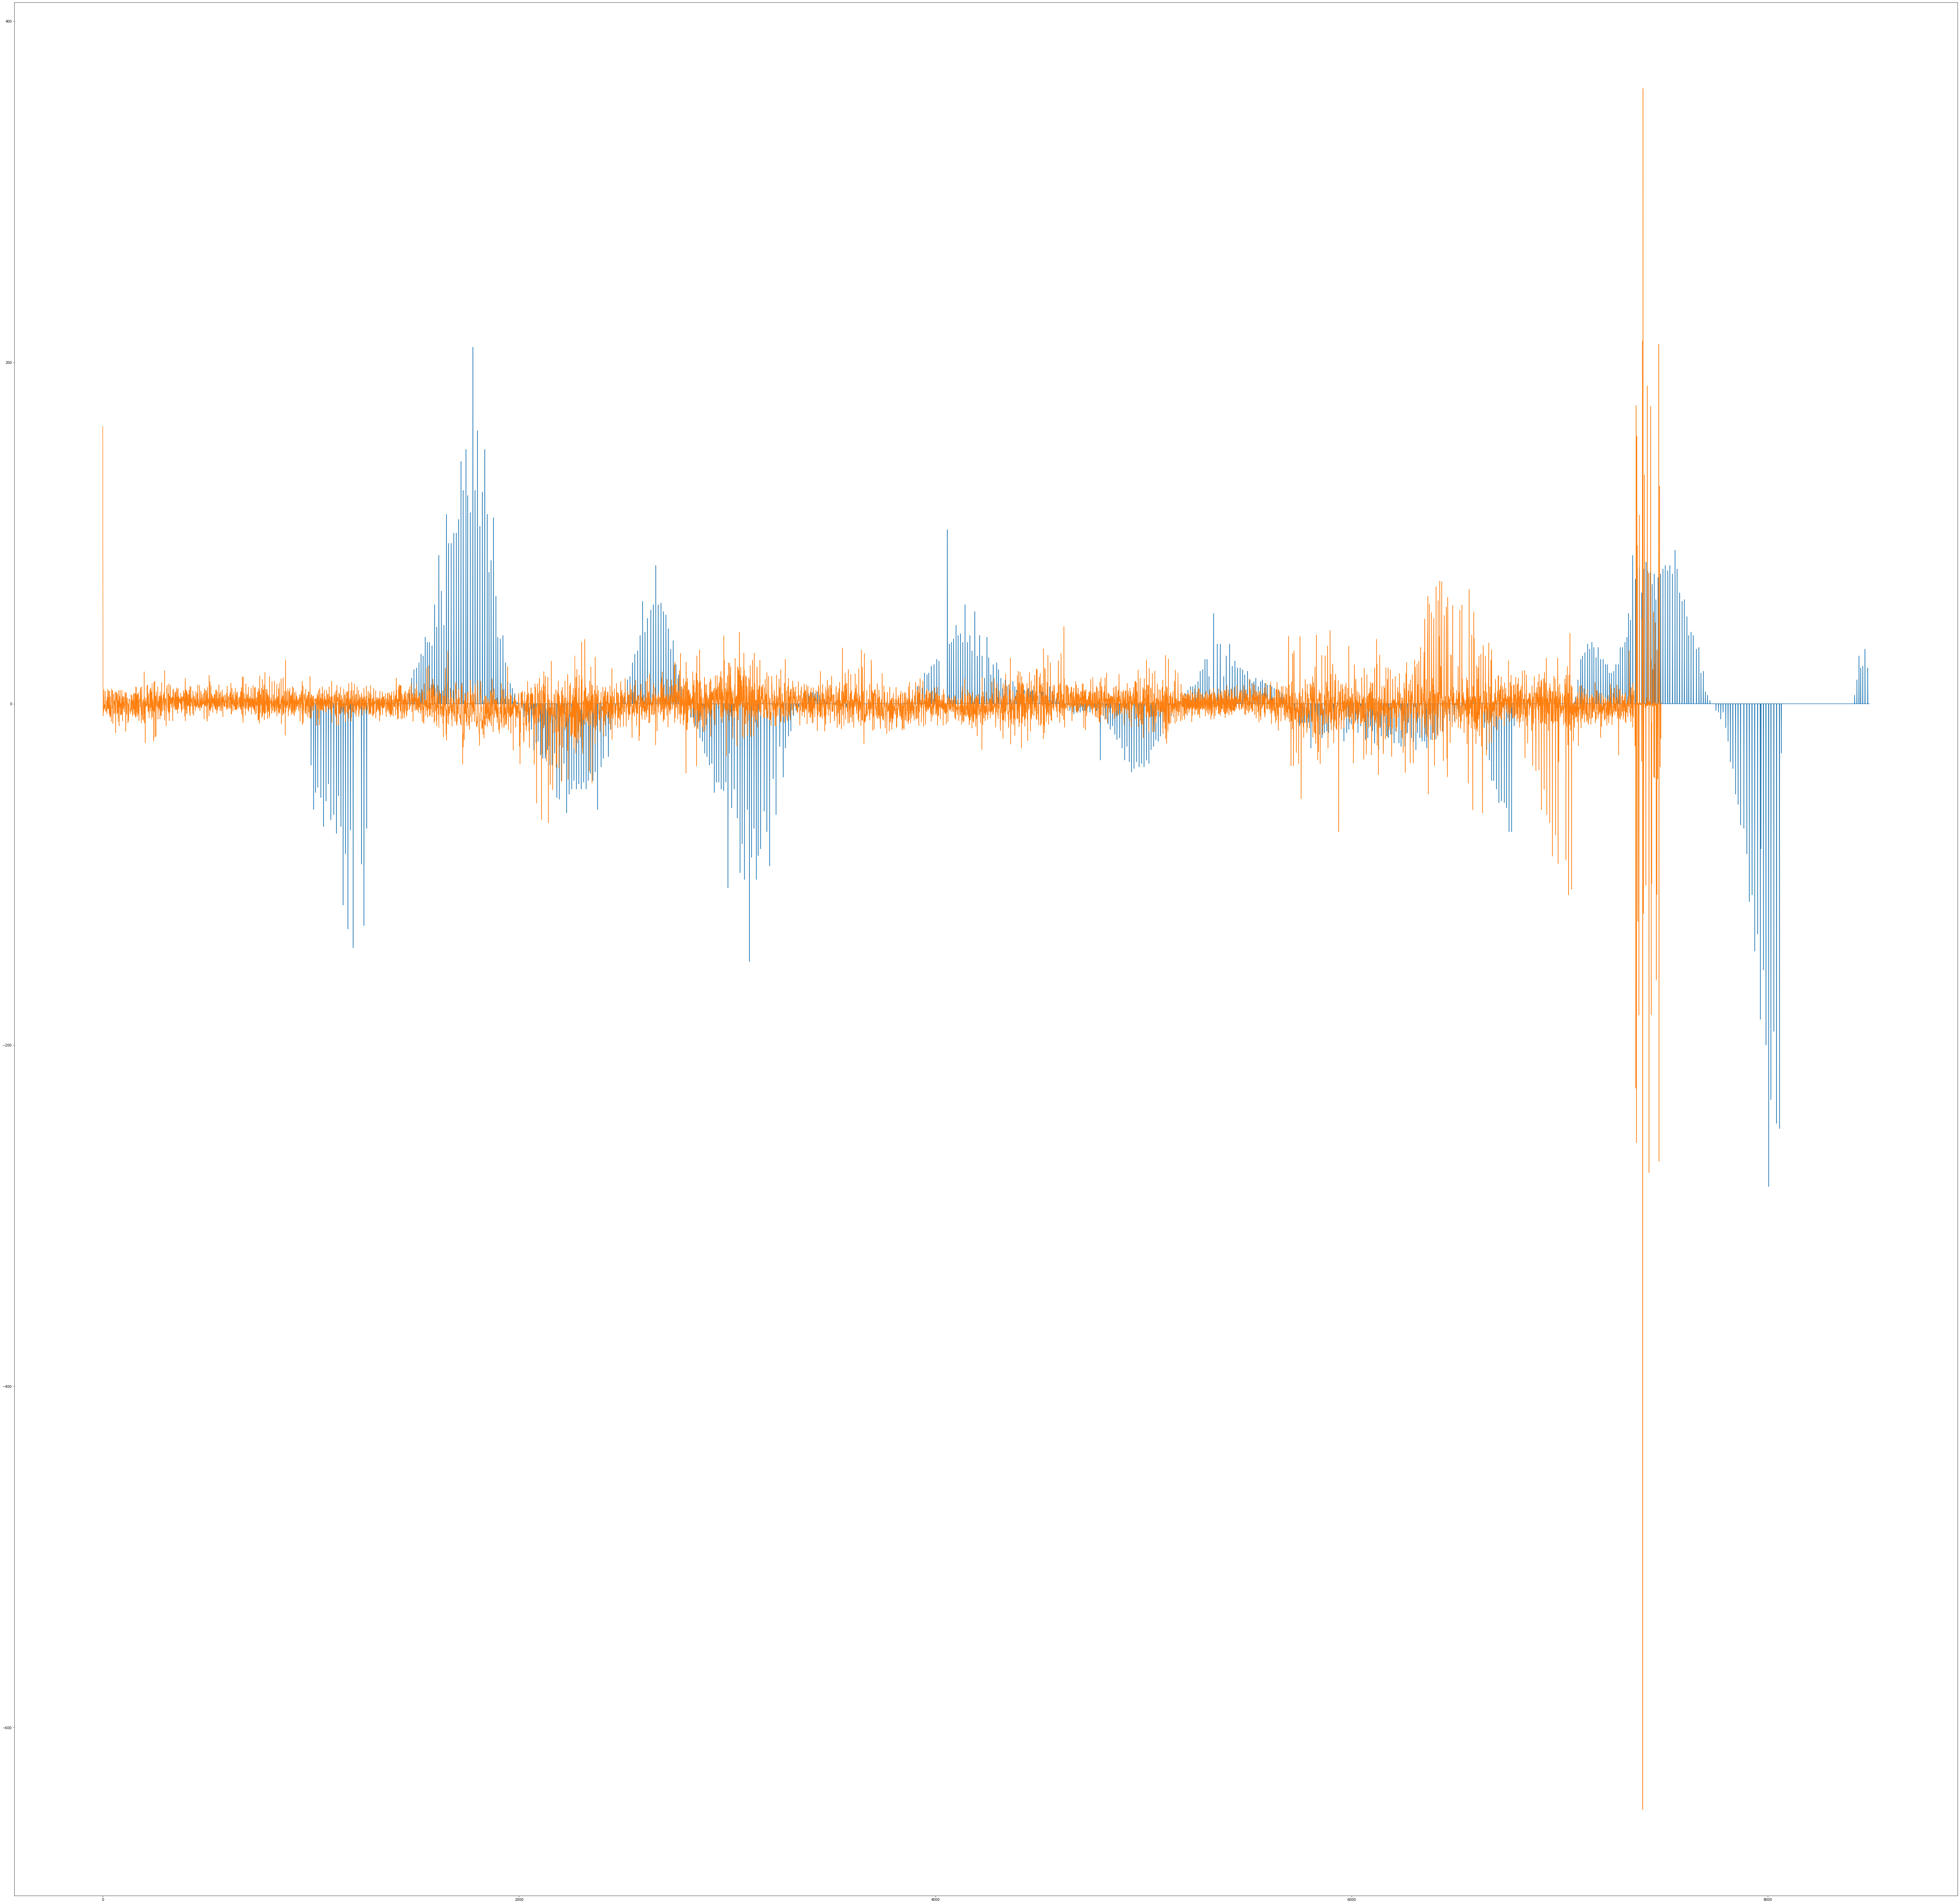

In [75]:
plt.figure(figsize=(100,100))
plt.plot(y);
plt.plot(lr_x.predict(X));


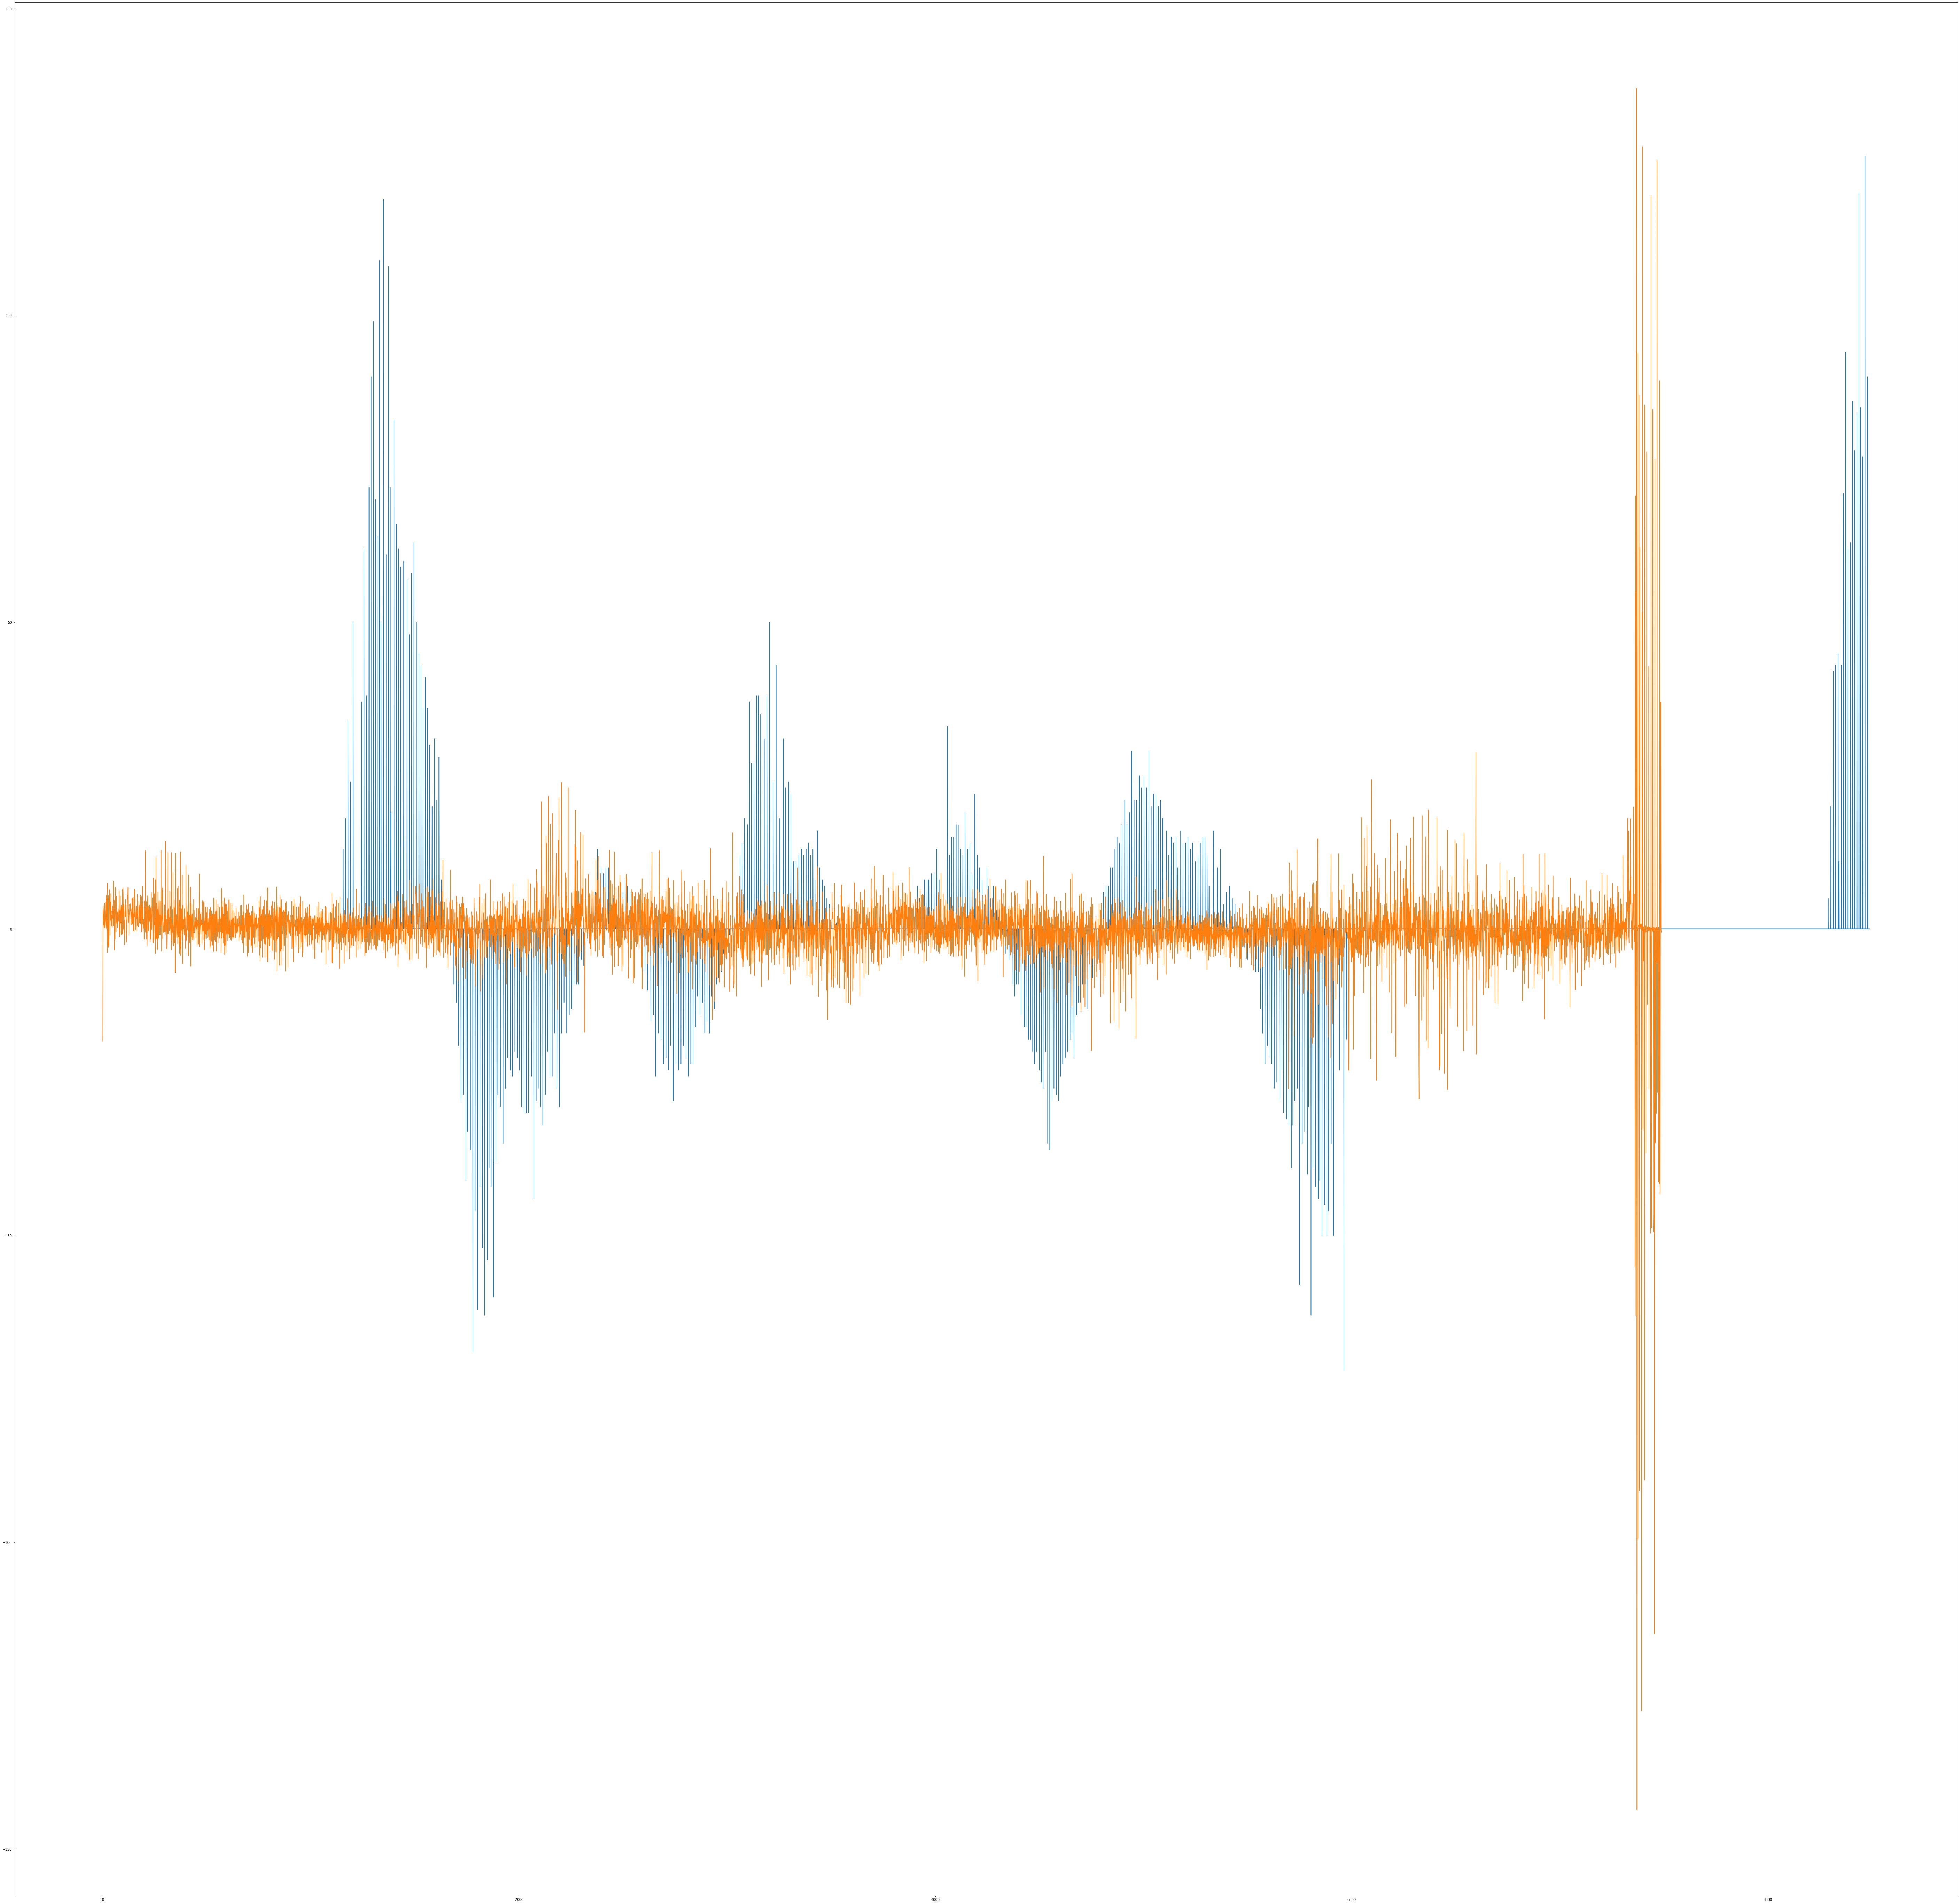

In [76]:
plt.figure(figsize=(100,100))
plt.plot(z);
plt.plot(lr_y.predict(W));


In [77]:
ab_x = GradientBoostingRegressor()
ab_x.fit(X_train, y_train)

ab_y = GradientBoostingRegressor()
ab_y.fit(W_train, z_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
ab_x.score(X_train, y_train), ab_x.score(X_test, y_test)

(0.43350354050814166, -0.11285949803568918)

In [79]:
ab_y.score(W_train, z_train), ab_y.score(W_test, z_test)

(0.35629608621748166, -0.03192084766556369)

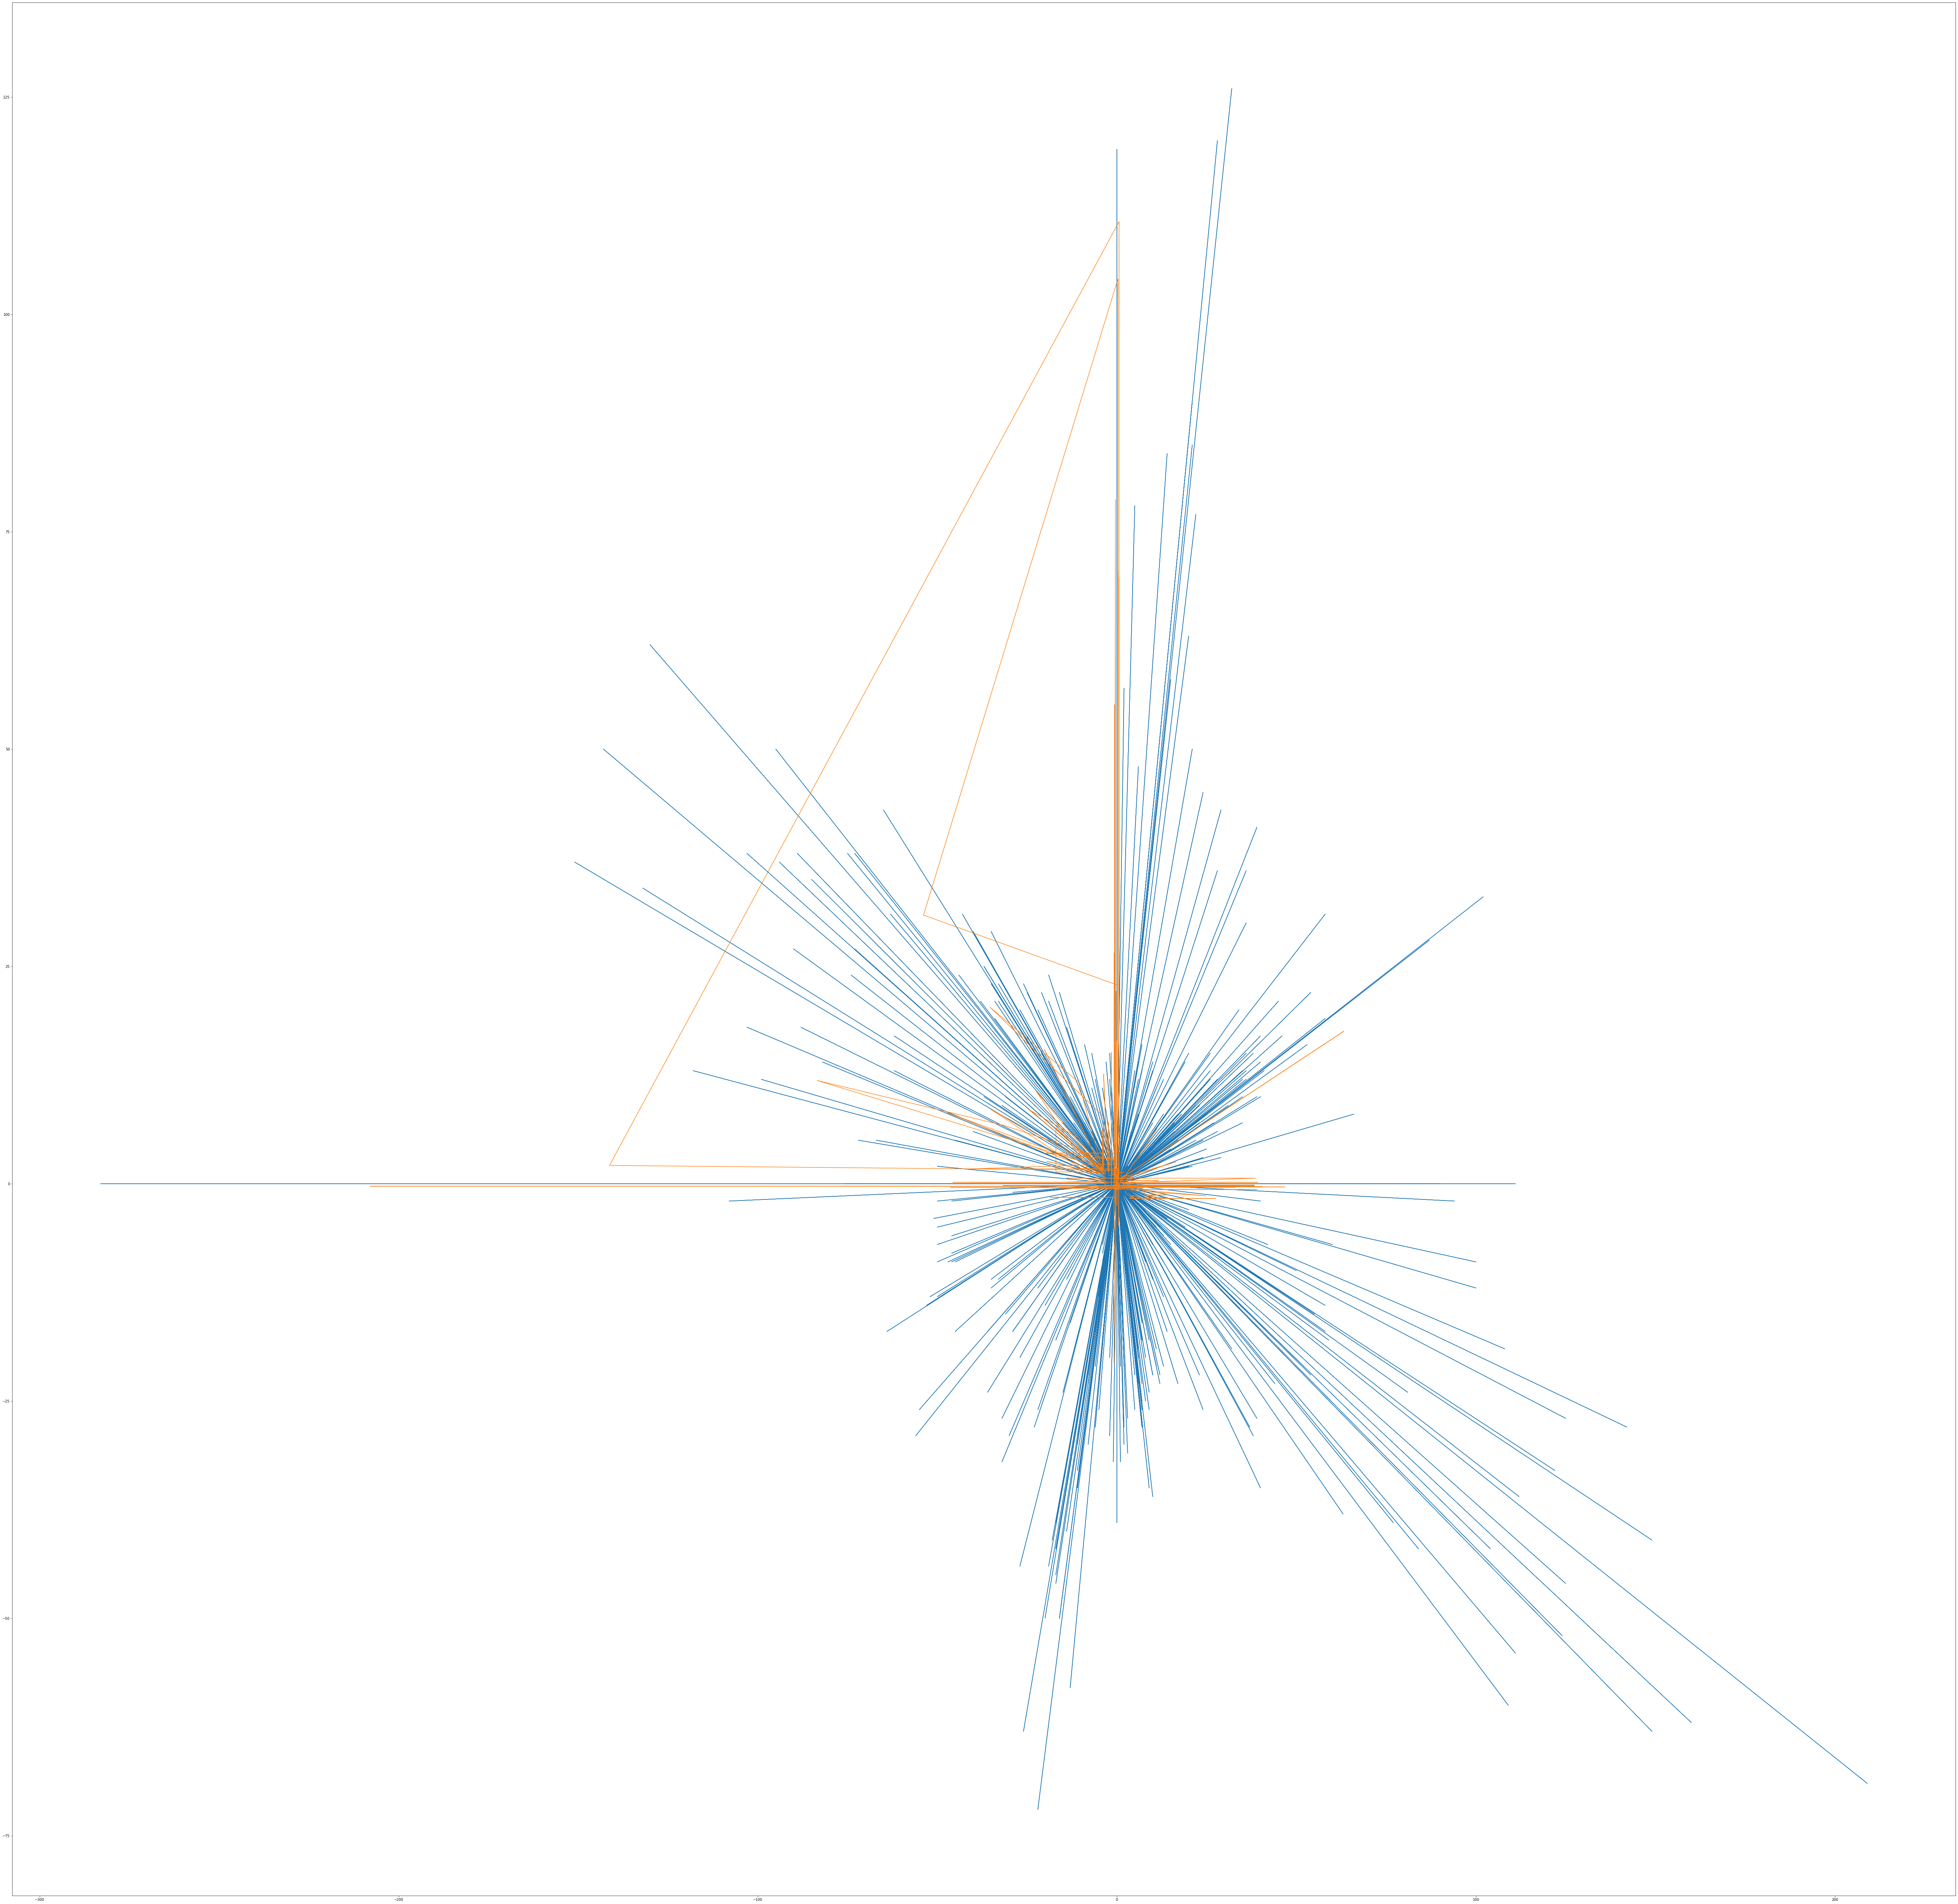

In [80]:
plt.figure(figsize=(100,100))
plt.plot(y, z);
plt.plot(ab_x.predict(X), ab_y.predict(W));


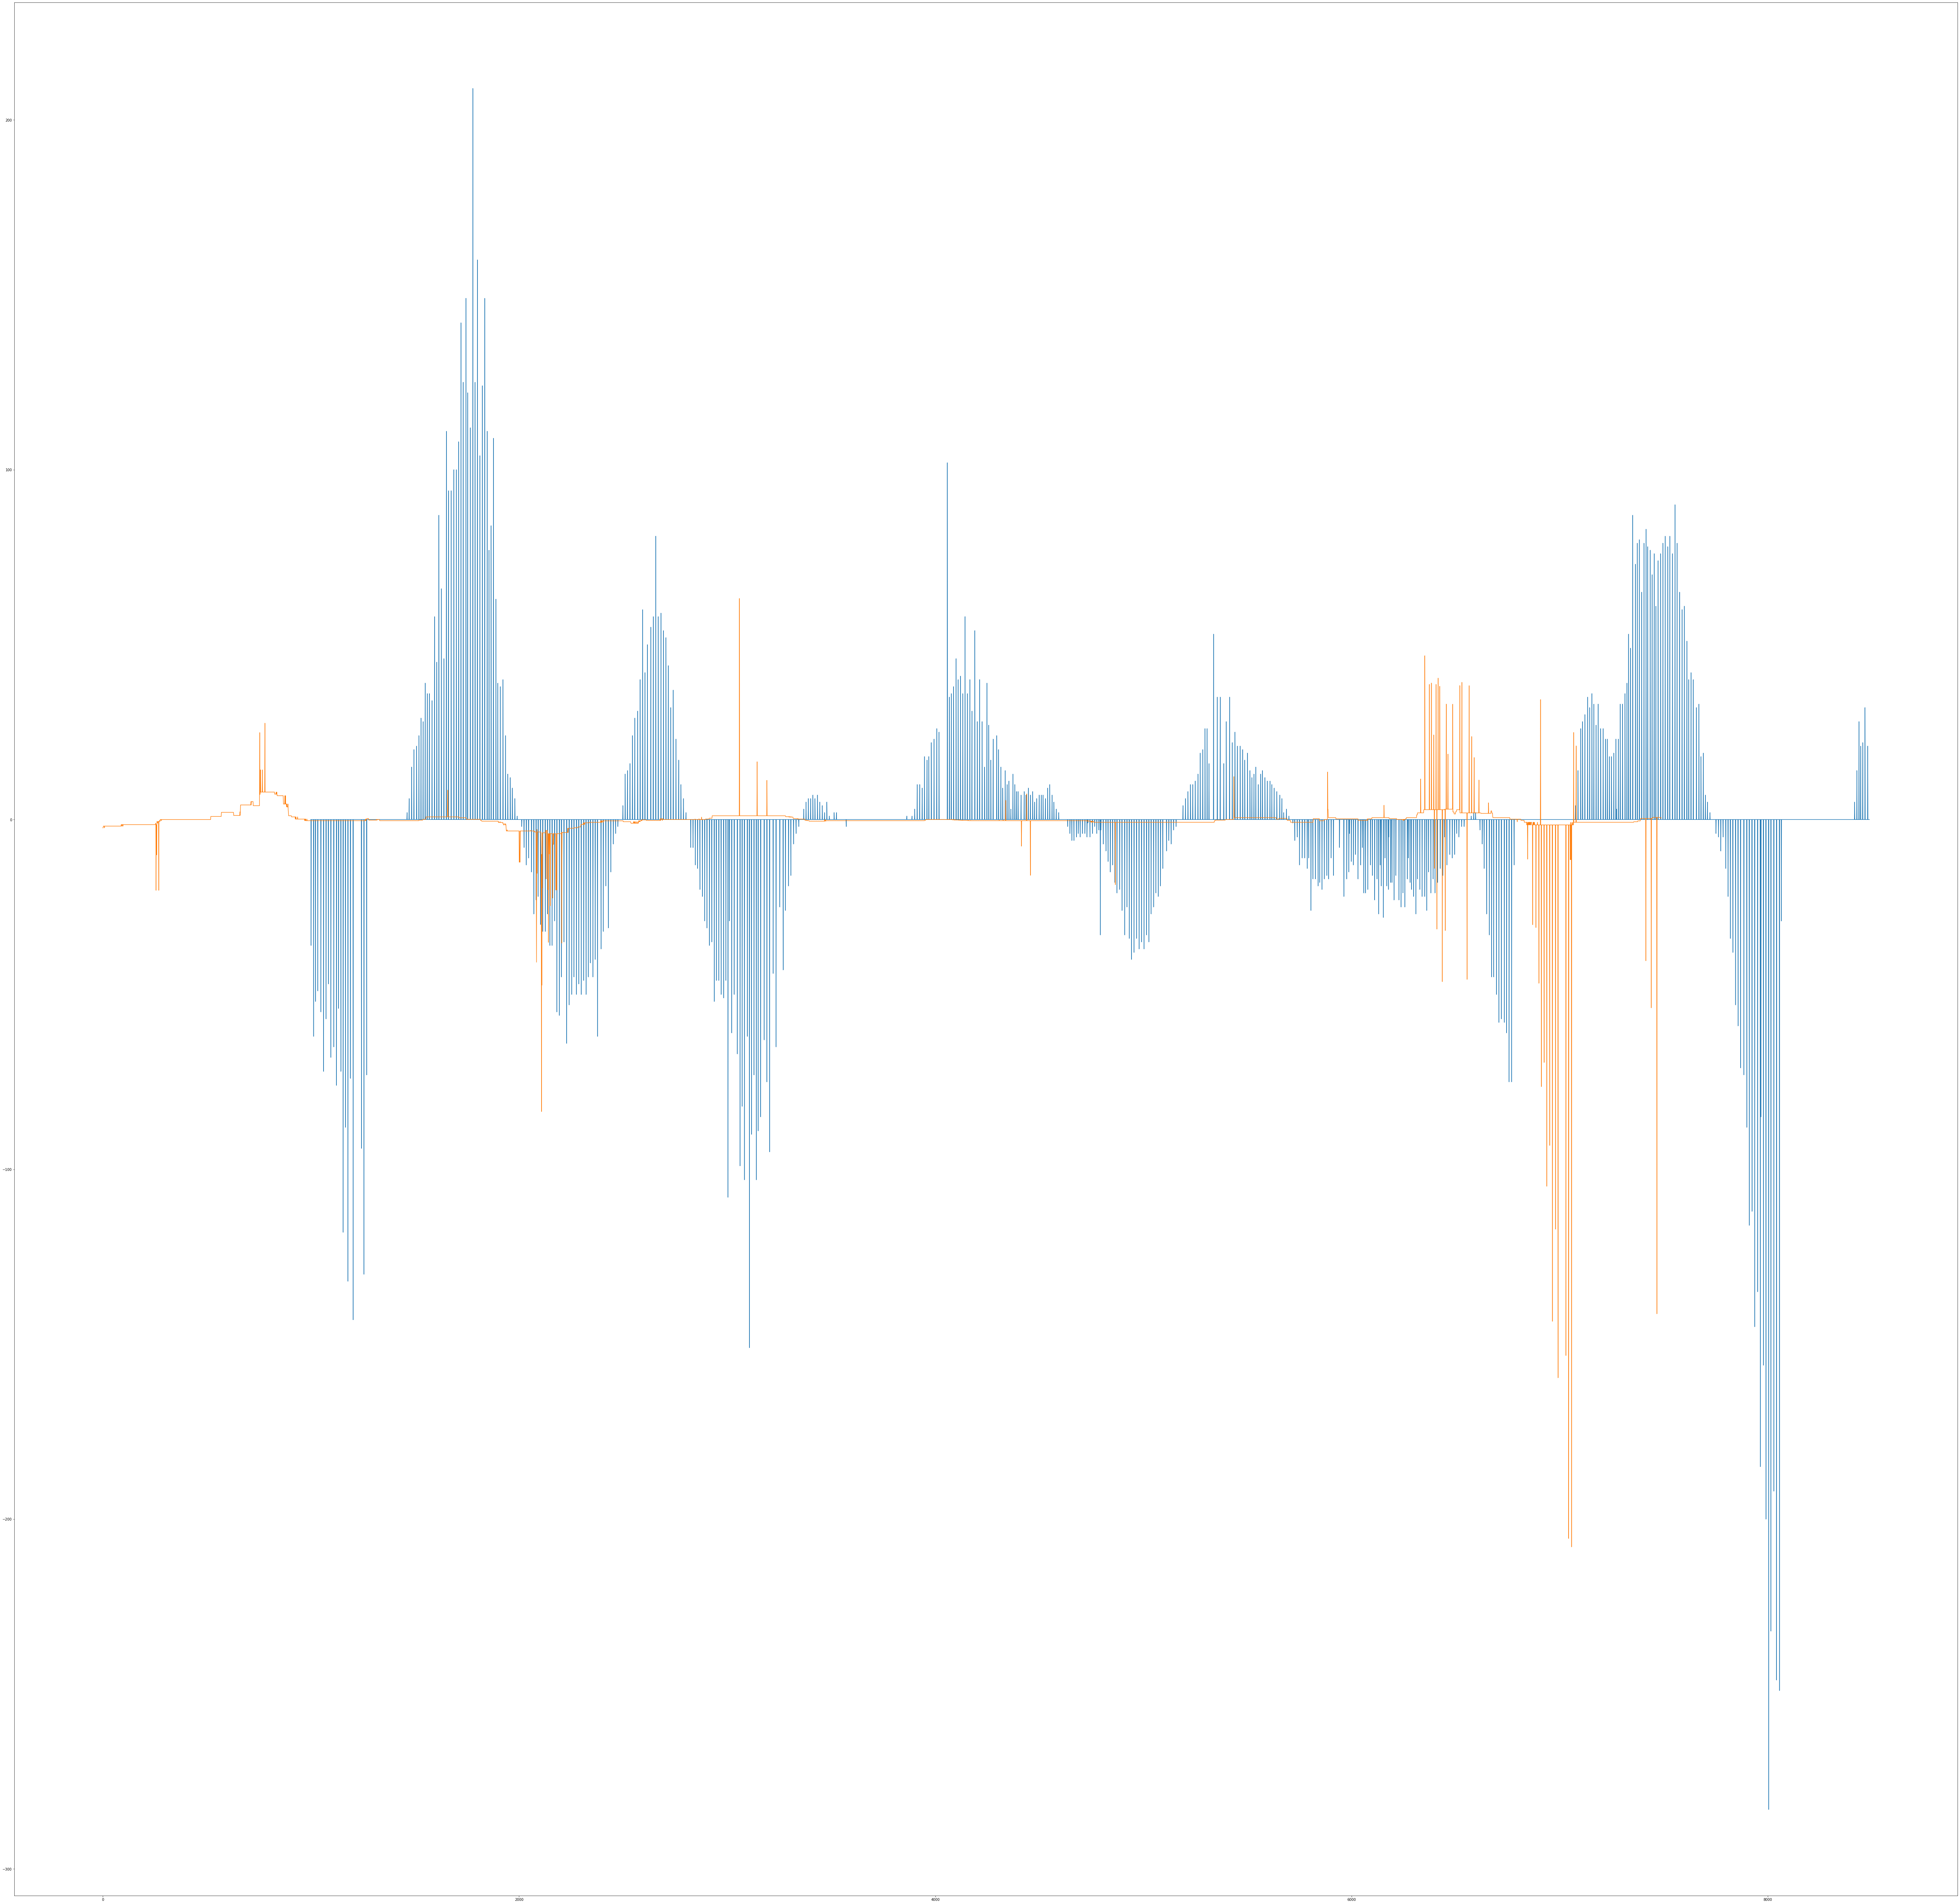

In [81]:
plt.figure(figsize=(100,100))
plt.plot(y);
plt.plot(ab_x.predict(X));

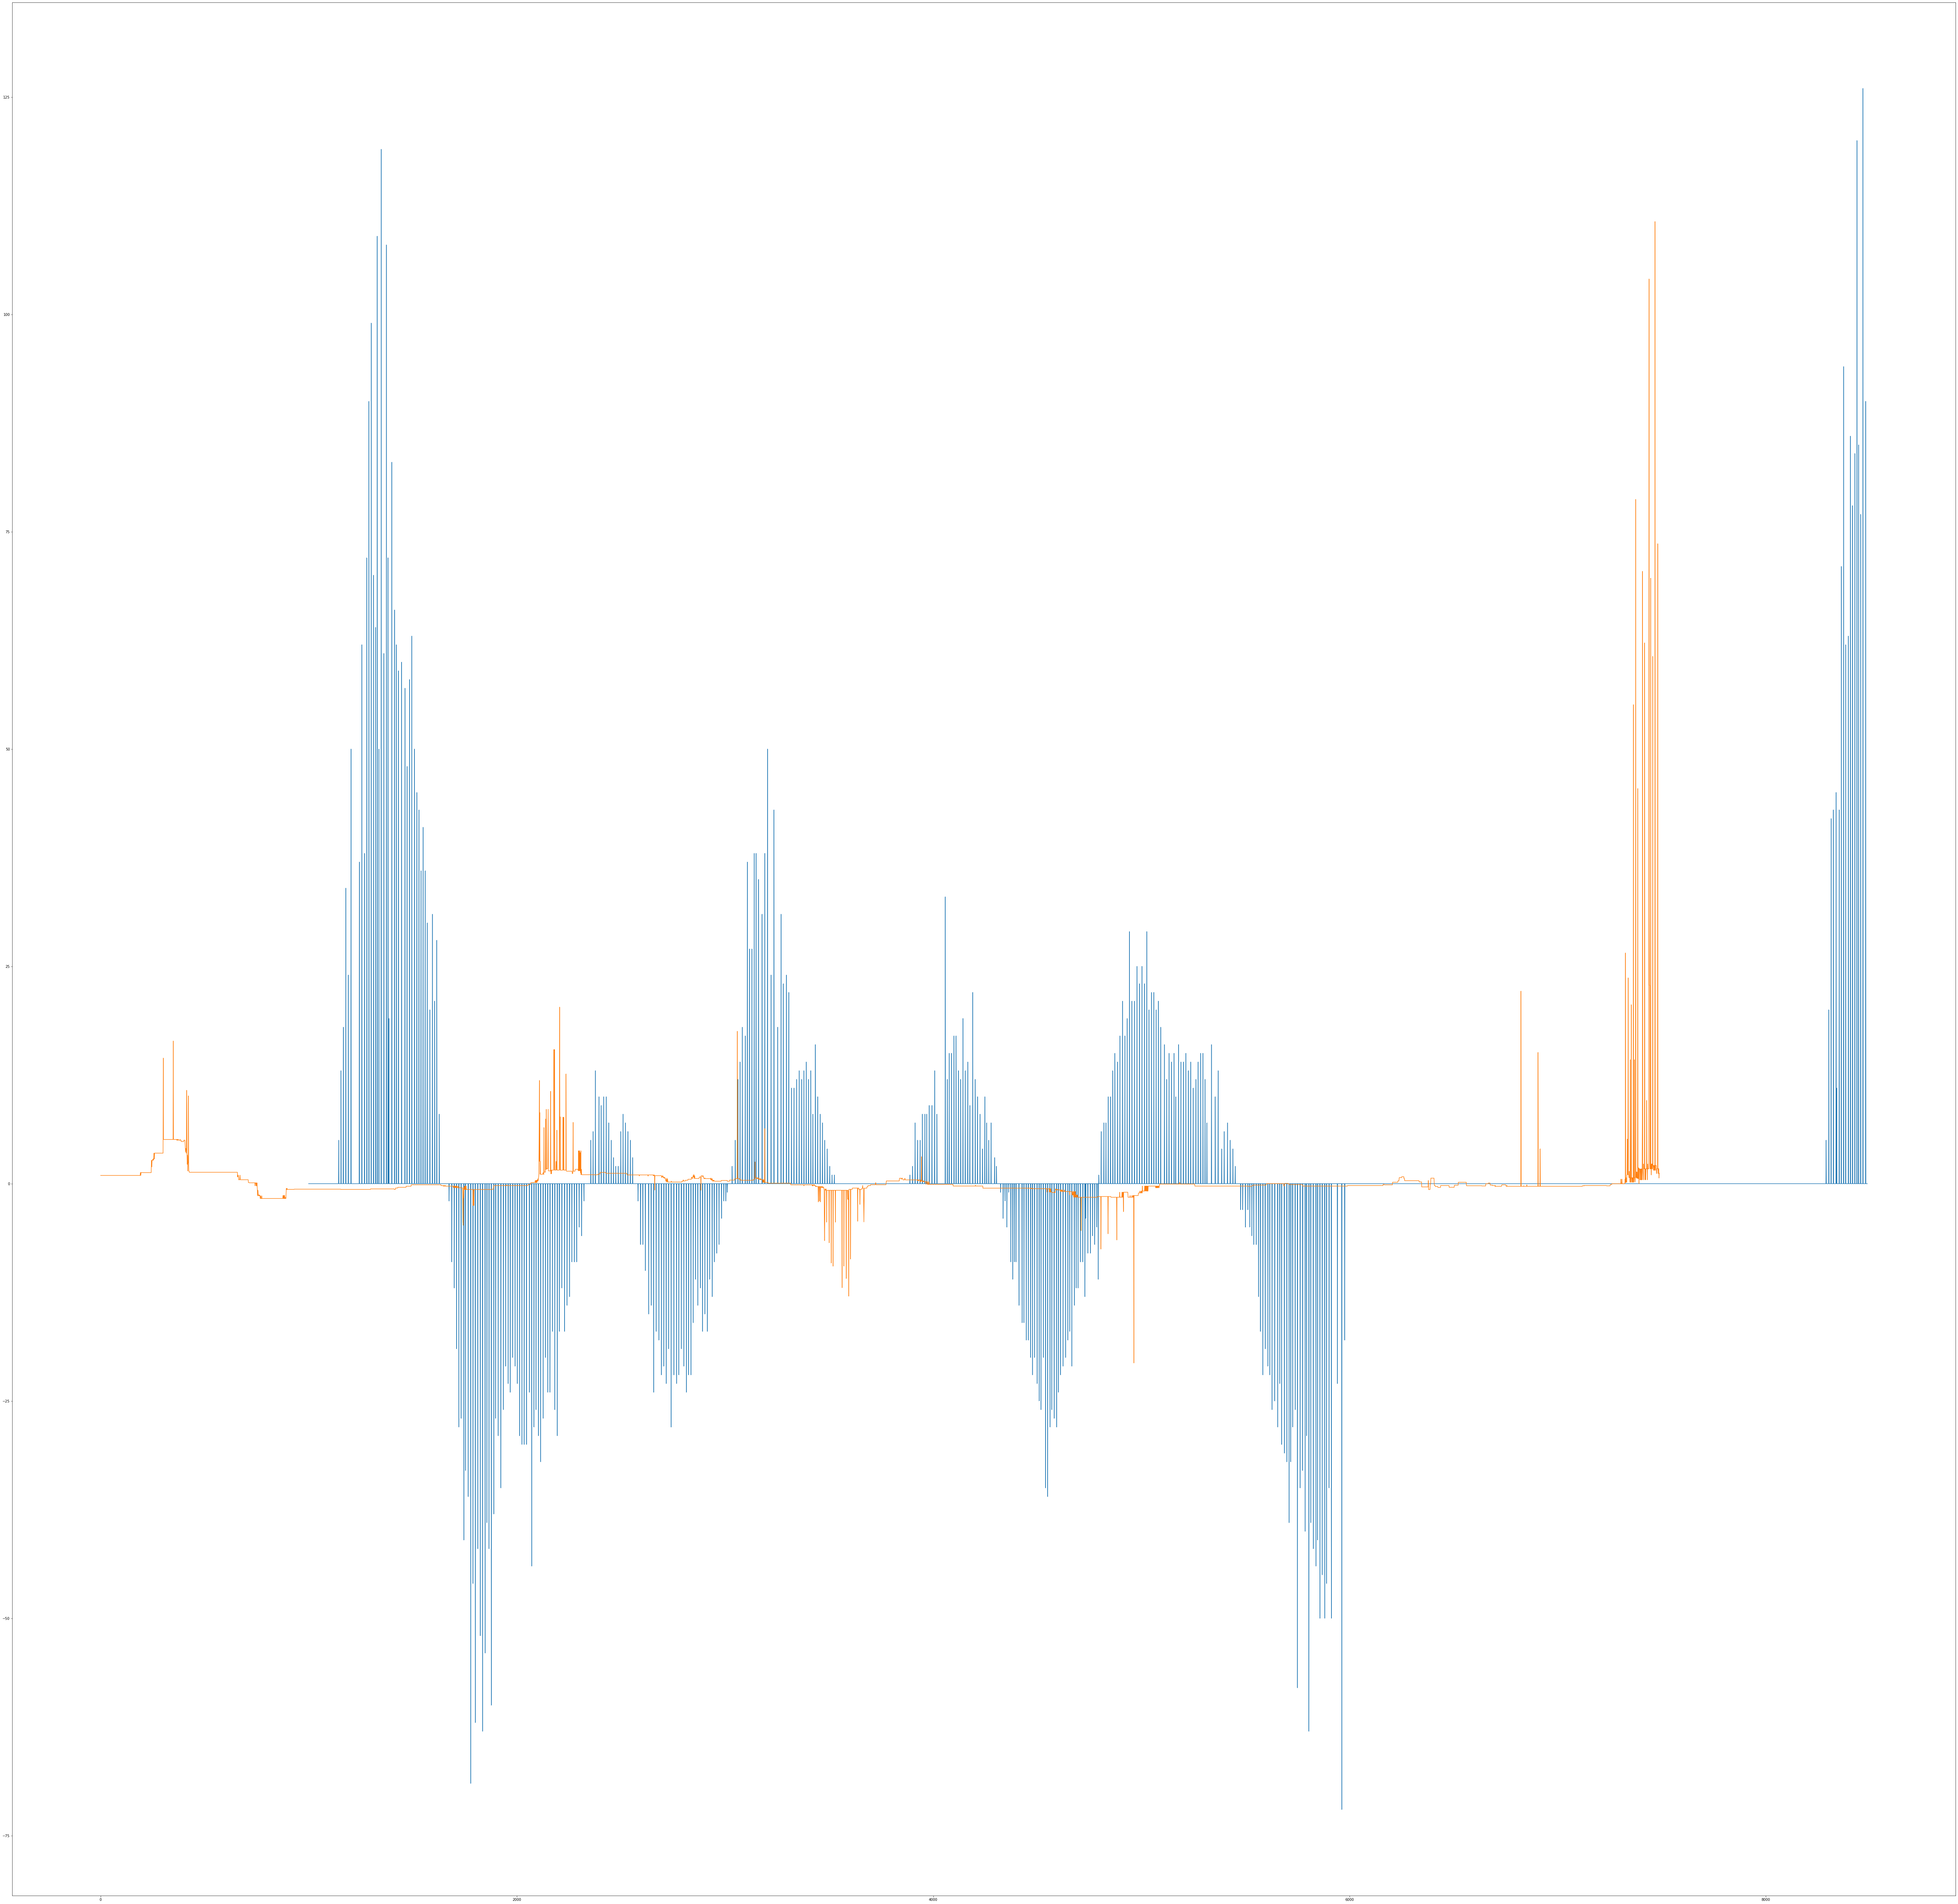

In [82]:
plt.figure(figsize=(100,100))
plt.plot(z);
plt.plot(ab_y.predict(W));

In [83]:
X_test

channel_1  channel_2  channel_1_1  channel_2_1  channel_1_2  \
6845         15        123         15.0        123.0         15.0   
6230         15        270         15.0        271.0         15.0   
4550         37        379         37.0        379.0         37.0   
7461         10        112         10.0        112.0         10.0   
1467         38        276         38.0        276.0         38.0   
...         ...        ...          ...          ...          ...   
4744         33        351         33.0        352.0         33.0   
4186         46        572         46.0        572.0         46.0   
6596         56        534         56.0        534.0         56.0   
5714         21        315         21.0        315.0         21.0   
6119         16        279         16.0        280.0         16.0   

      channel_2_2  channel_1_3  channel_2_3  channel_1_4  channel_2_4  ...  \
6845        123.0         15.0        123.0         15.0        123.0  ...   
6230        271.0         15.0        271.0         15.0        271.0  ...   
4550        379.0         37.0        379.0         37.0        379.0  ...   
7461        112.0         10.0        112.0         10.0        112.0  ...   
1467        276.0         38.0        276.0         38.0        277.0  ...   
...           ...          ...          ...          ...          ...  ...   
4744        352.0         33.0        352.0         33.0        352.0  ...   
4186        572.0         46.0        572.0         46.0        573.0  ...   
6596        534.0         56.0        534.0         56.0        534.0  ...   
5714        315.0         21.0        315.0         21.0        315.0  ...   
6119        279.0         15.0        279.0         16.0        279.0  ...   

      channel_1_995  channel_2_995  channel_1_996  channel_2_996  \
6845           19.0          302.0           19.0          302.0   
6230           26.0          376.0           27.0          376.0   
4550           41.0          542.0           41.0          542.0   
7461           13.0          127.0           13.0          127.0   
1467           61.0          364.0           61.0          364.0   
...             ...            ...            ...            ...   
4744           38.0          380.0           38.0          380.0   
4186           52.0          627.0           52.0          627.0   
6596           23.0          327.0           22.0          327.0   
5714           33.0          355.0           33.0          354.0   
6119           28.0          524.0           28.0          524.0   

      channel_1_997  channel_2_997  channel_1_998  channel_2_998  \
6845           19.0          302.0           19.0          302.0   
6230           27.0          376.0           27.0          376.0   
4550           42.0          542.0           43.0          542.0   
7461           13.0          127.0           13.0          127.0   
1467           61.0          364.0           61.0          364.0   
...             ...            ...            ...            ...   
4744           38.0          381.0           38.0          381.0   
4186           52.0          627.0           52.0          627.0   
6596           22.0          327.0           23.0          327.0   
5714           33.0          355.0           33.0          355.0   
6119           28.0          524.0           28.0          524.0   

      channel_1_999  channel_2_999  
6845           19.0          302.0  
6230           27.0          377.0  
4550           42.0          542.0  
7461           13.0          127.0  
1467           62.0          364.0  
...             ...            ...  
4744           38.0          381.0  
4186           51.0          627.0  
6596           22.0          327.0  
5714           33.0          355.0  
6119           28.0          524.0  

[1873 rows x 2000 columns]

In [84]:
ab_x.predict(X_test)

array([-0.336871  , -0.78118697, -0.327668  , ...,  0.54833278,
       -0.327668  , -0.78118697])

In [85]:
ab_x.predict(np.array(X_test.iloc[0]).reshape(1, -1))
# X_test.iloc[0]

array([-0.336871])

In [86]:
len(X_test.columns)

2000

In [87]:
y_test

6845     0.0
6230     0.0
4550    10.0
7461     0.0
1467     0.0
        ... 
4744     0.0
4186     0.0
6596     2.0
5714     0.0
6119     0.0
Name: x_diff, Length: 1873, dtype: float64

In [88]:
from collections import deque

# test = deque()

# [test.append(val) for val in X_test.iloc[0]]

ab_x.predict([deque(X_test.iloc[0])])

array([-0.336871])

In [89]:
ab_x = GradientBoostingRegressor()
ab_x.fit(X_train, y_train)

ab_y = GradientBoostingRegressor()
ab_y.fit(W_train, z_train)